In [1]:
import io
import numpy as np
import torch
torch.set_num_threads(1)
import torchaudio
import matplotlib
import matplotlib.pylab as plt
import pyaudio


In [2]:
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /Users/huyvu/.cache/torch/hub/master.zip


In [3]:
(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

In [4]:
# Taken from utils_vad.py
def validate(model,
             inputs: torch.Tensor):
    with torch.no_grad():
        outs = model(inputs)
    return outs

# Provided by Alexander Veysov
def int2float(sound):
    abs_max = np.abs(sound).max()
    sound = sound.astype('float32')
    if abs_max > 0:
        sound *= 1/32768
    sound = sound.squeeze()  # depends on the use case
    return sound

In [5]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
SAMPLE_RATE = 16000
CHUNK = int(SAMPLE_RATE / 10)

audio = pyaudio.PyAudio()

In [6]:
num_samples = 512

Started Recording
Stopped the recording


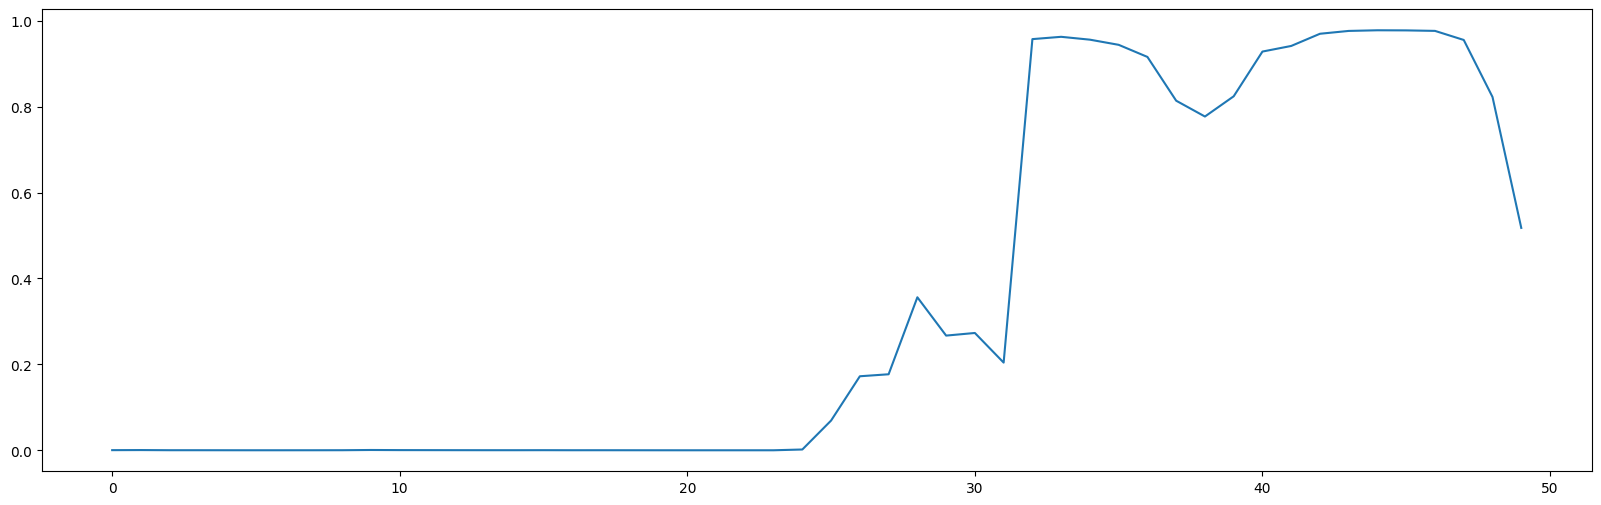

In [12]:
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
data = []
voiced_confidences = []

frames_to_record = 50

print("Started Recording")
for i in range(0, frames_to_record):
    
    audio_chunk = stream.read(num_samples)
    
    # in case you want to save the audio later
    data.append(audio_chunk)
    
    audio_int16 = np.frombuffer(audio_chunk, np.int16);

    audio_float32 = int2float(audio_int16)
    # print("call model")
    # get the confidences and add them to the list to plot them later
    new_confidence = model(torch.from_numpy(audio_float32), 16000).item()
    # print("called")
    voiced_confidences.append(new_confidence)
    
print("Stopped the recording")

# plot the confidences for the speech
plt.figure(figsize=(20,6))
plt.plot(voiced_confidences)
plt.show()